In this version, let's suppose the pixels id are already mapped (top left corner for pixel 0)

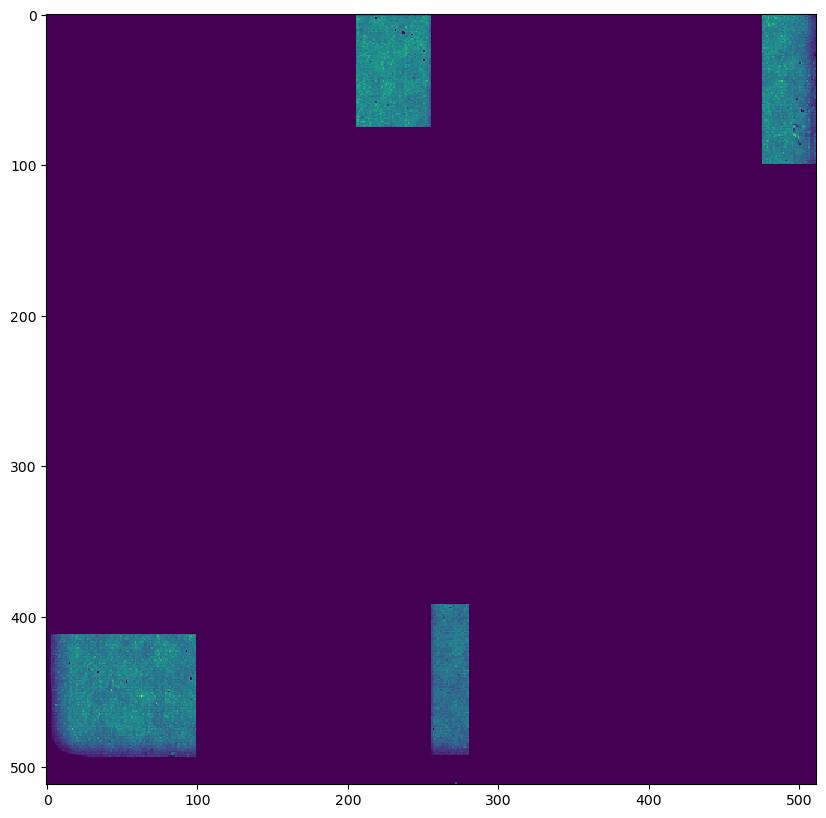

In [17]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

nexus_file = "/SNS/VENUS/IPTS-34969/nexus/VENUS_7703.nxs.h5"

with h5py.File(nexus_file, 'r') as hdf5_data:
    event_time_offset_original = hdf5_data['entry']['bank100_events']['event_time_offset'][:]
    event_id_original = hdf5_data['entry']['bank100_events']['event_id'][:]

offset_value = 1000000  # Offset value
event_id_original -= offset_value

# DEBUGGING: Work with only the first n events
# n_events = min(len(event_time_offset_original), 300000000)
# event_time_offset = event_time_offset_original[:n_events]
# event_id = event_id_original[:n_events]
event_id = event_id_original

# hist, bin_edges = np.histogram(event_time_offset, bins=1000, range=(0, 16667))

# Vectorized mapping function
def map_pixels_to_coordinates(pixel_ids):
    rows = pixel_ids % 512
    cols = pixel_ids // 512
    return rows, cols

# Initialize the full image
full_image = np.zeros((512, 512), dtype=np.int32)

# Vectorized processing
rows, cols = map_pixels_to_coordinates(event_id)
np.add.at(full_image, (cols, rows), 1)

# Plot the result
plt.figure(0, figsize=(10, 10))
plt.imshow(full_image, cmap='viridis', interpolation='nearest')
plt.show()

In [12]:
256%512

256